In [1]:
# """
# network.py
# ~~~~~~~~~~
# A module to implement the stochastic gradient descent learning
# algorithm for a feedforward neural network.  Gradients are calculated
# using backpropagation.  Note that I have focused on making the code
# simple, easily readable, and easily modifiable.  It is not optimized,
# and omits many desirable features.
# """

# #### Libraries
# # Standard library
# import random

# # Third-party libraries
# import numpy as np

# class Network(object):

#     def __init__(self, sizes):
#         """The list ``sizes`` contains the number of neurons in the
#         respective layers of the network.  For example, if the list
#         was [2, 3, 1] then it would be a three-layer network, with the
#         first layer containing 2 neurons, the second layer 3 neurons,
#         and the third layer 1 neuron.  The biases and weights for the
#         network are initialized randomly, using a Gaussian
#         distribution with mean 0, and variance 1.  Note that the first
#         layer is assumed to be an input layer, and by convention we
#         won't set any biases for those neurons, since biases are only
#         ever used in computing the outputs from later layers."""
#         self.num_layers = len(sizes)
#         self.sizes = sizes
#         random.seed(1)
#         self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
# #         print(biases)
#         self.weights = [np.random.randn(y, x)
#                         for x, y in zip(sizes[:-1], sizes[1:])]
# #         print(weights)

#     def feedforward(self, a):
#         """Return the output of the network if ``a`` is input."""
#         for b, w in zip(self.biases, self.weights):
#             a = sigmoid(np.dot(w, a)+b)
#         return a

#     def SGD(self, training_data, epochs, mini_batch_size, eta,
#             test_data=None):
#         """Train the neural network using mini-batch stochastic
#         gradient descent.  The ``training_data`` is a list of tuples
#         ``(x, y)`` representing the training inputs and the desired
#         outputs.  The other non-optional parameters are
#         self-explanatory.  If ``test_data`` is provided then the
#         network will be evaluated against the test data after each
#         epoch, and partial progress printed out.  This is useful for
#         tracking progress, but slows things down substantially."""
#         if test_data: n_test = len(test_data)
#         n = len(training_data)
#         for j in range(epochs):
#             random.seed(j)
#             random.shuffle(training_data)
#             mini_batches = [
#                 training_data[k:k+mini_batch_size]
#                 for k in range(0, n, mini_batch_size)]
#             for mini_batch in mini_batches:
#                 self.update_mini_batch(mini_batch, eta)
#             if test_data:
#                 print ("Epoch {0}: {1} / {2}".format(
#                     j, self.evaluate(test_data), n_test))
# #             else:
# #                 print ("Epoch {0} complete".format(j))

#     def update_mini_batch(self, mini_batch, eta):
#         """Update the network's weights and biases by applying
#         gradient descent using backpropagation to a single mini batch.
#         The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
#         is the learning rate."""
#         nabla_b = [np.zeros(b.shape) for b in self.biases]
#         nabla_w = [np.zeros(w.shape) for w in self.weights]
#         for x, y in mini_batch:
#             delta_nabla_b, delta_nabla_w = self.backprop(x, y)
#             nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
#             nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
#         self.weights = [w-(eta/len(mini_batch))*nw
#                         for w, nw in zip(self.weights, nabla_w)]
#         self.biases = [b-(eta/len(mini_batch))*nb
#                        for b, nb in zip(self.biases, nabla_b)]

#     def backprop(self, x, y):
#         """Return a tuple ``(nabla_b, nabla_w)`` representing the
#         gradient for the cost function C_x.  ``nabla_b`` and
#         ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
#         to ``self.biases`` and ``self.weights``."""
#         nabla_b = [np.zeros(b.shape) for b in self.biases]
#         nabla_w = [np.zeros(w.shape) for w in self.weights]
#         # feedforward
#         activation = x
#         activations = [x] # list to store all the activations, layer by layer
#         zs = [] # list to store all the z vectors, layer by layer
#         for b, w in zip(self.biases, self.weights):
#             z = np.dot(w, activation)+b
#             zs.append(z)
#             activation = sigmoid(z)
#             activations.append(activation)
#         # backward pass
#         delta = self.cost_derivative(activations[-1], y) * \
#             sigmoid_prime(zs[-1])
#         nabla_b[-1] = delta
#         nabla_w[-1] = np.dot(delta, activations[-2].transpose())
#         # Note that the variable l in the loop below is used a little
#         # differently to the notation in Chapter 2 of the book.  Here,
#         # l = 1 means the last layer of neurons, l = 2 is the
#         # second-last layer, and so on.  It's a renumbering of the
#         # scheme in the book, used here to take advantage of the fact
#         # that Python can use negative indices in lists.
#         for l in range(2, self.num_layers):
#             z = zs[-l]
#             sp = sigmoid_prime(z)
#             delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
#             nabla_b[-l] = delta
#             nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
#         return (nabla_b, nabla_w)

#     def evaluate(self, test_data):
#         """Return the number of test inputs for which the neural
#         network outputs the correct result. Note that the neural
#         network's output is assumed to be the index of whichever
#         neuron in the final layer has the highest activation."""
#         test_results = [(np.argmax(self.feedforward(x)), y)
#                         for (x, y) in test_data]
#         return sum(int(x == y) for (x, y) in test_results)

#     def cost_derivative(self, output_activations, y):
#         """Return the vector of partial derivatives \partial C_x /
#         \partial a for the output activations."""
#         return (output_activations-y)

# #### Miscellaneous functions
# def sigmoid(z):
#     """The sigmoid function."""
#     return 1.0/(1.0+np.exp(-z))

# def sigmoid_prime(z):
#     """Derivative of the sigmoid function."""
#     return sigmoid(z)*(1-sigmoid(z))

In [2]:
#libraries
import numpy as np 
import pandas as pd

import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
        if row['pred'] == 1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

def plotting_train(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

In [6]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [7]:
# train = build_data_partA(1)
# first_test = build_data_partA(9)
# second_test = build_data_partA(8)

# trainlist=[]
# for index, row in train.iterrows():
#     trainlist.append((np.array(row['x'],row['y']),row['value']))
    
# testlist1=[]
# for index, row in first_test.iterrows():
#     testlist1.append((np.array(row['x'],row['y']),row['value']))
    
# testlist2=[]
# for index, row in second_test.iterrows():
#     testlist2.append((np.array(row['x'],row['y']),row['value']))
    

# net1=Network([2,2,2])
# net1.SGD(trainlist,100,125,0.01)
# print(net1.evaluate(testlist1))
# # print(net1.evaluate(testlist2))
    

In [8]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

In [9]:
# # Loading dataset
# data = load_iris()

# # Dividing the dataset into target variable and features
# X=data.data
# y=data.target

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)


In [11]:
# learning_rate = 0.1
# iterations = 5000
# N = y_train.size
 
# # Input features
# input_size = 4
 
# # Hidden layers 
# hidden_size = 2
 
# # Output layer
# output_size = 3 
 
# results = pd.DataFrame(columns=["mse", "accuracy"])


# np.random.seed(10)
 
# # Hidden layer
# W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
 
# # Output layer
# W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 



# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))
 
# def mean_squared_error(y_pred, y_true):
#     return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
     
# def accuracy(y_pred, y_true):
#     acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
#     return acc.mean()


# for itr in range(iterations):    
     
#     # Implementing feedforward propagation on hidden layer
#     Z1 = np.dot(X_train, W1)
#     A1 = sigmoid(Z1)
    
 
#     # Implementing feed forward propagation on output layer
#     Z2 = np.dot(A1, W2)
#     A2 = sigmoid(Z2)
    
   
#     print(A2.shape) 
#     print(y_train)
    
# #     a3=[]
# #     for r in A2:
# #         a3.append(max(r))
    
    
# #     # Calculating the error
# #     mse = mean_squared_error(a3, y_train)
# #     acc = accuracy(a3, y_train)
# #     results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
     
#     # Backpropagation phase
#     E1 = A2 - y_train
#     dW1 = E1 * A2 * (1 - A2)
 
#     E2 = np.dot(dW1, W2.T)
#     dW2 = E2 * A1 * (1 - A1)
 
     
#     # Updating the weights
#     W2_update = np.dot(A1.T, dW1) / N
#     W1_update = np.dot(X_train.T, dW2) / N
 
#     W2 = W2 - learning_rate * W2_update
#     W1 = W1 - learning_rate * W1_update
    
    
# # results.mse.plot(title="Mean Squared Error")   

# Z1 = np.dot(X_test, W1)
# A1 = sigmoid(Z1)
 
# Z2 = np.dot(A1, W2)
# A2 = sigmoid(Z2)
 
# acc = accuracy(A2, y_test)
# print("Accuracy: {}".format(acc))


In [34]:
# we got good results with 5,2


In [12]:
from sklearn.neural_network import MLPClassifier

In [149]:
clf = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(5, 2), random_state=1)

In [150]:
train = build_data_partA(1)
first_test = build_data_partA(9)
second_test = build_data_partA(8)
train.head()

,x,y,value
0,-55.98,86.51,1
1,-79.33,-16.42,-1
2,-61.37,62.34,1
3,47.28,54.74,1
4,24.39,-31.21,-1


In [151]:
train_x=train[["x","y"]]
print(train_x.head())
train_y=train[["value"]]
print(train_y.head())

       x      y
0 -55.98  86.51
1 -79.33 -16.42
2 -61.37  62.34
3  47.28  54.74
4  24.39 -31.21
   value
0      1
1     -1
2      1
3      1
4     -1


In [152]:
clf.fit(train_x, train_y)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [153]:
test_x=first_test[["x","y"]]
test_y=first_test[["value"]]

In [154]:
predicted=clf.predict(test_x)
first_test["pred"]=predicted
first_test.head()

,x,y,value,pred
0,51.71,22.32,1,1
1,-12.47,-54.61,-1,-1
2,-39.01,-97.90,-1,-1
3,10.86,64.75,1,1
4,51.95,98.14,1,1


In [155]:
con_mat = confusion_matrix(predicted,test_y )

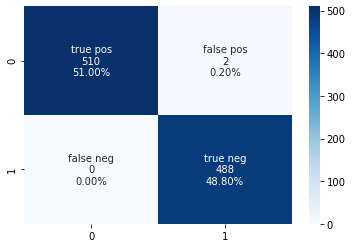

In [156]:
confussion_matrix(con_mat)

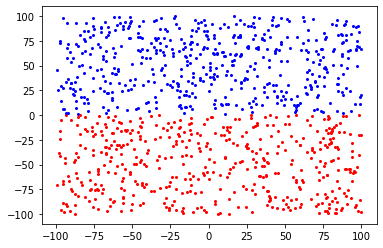

In [157]:
plotting_train(train)

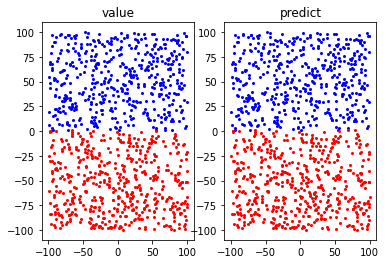

In [158]:
plotting_test(first_test)

In [159]:
trainb = build_data_partB(1)
first_testb = build_data_partB(9)
second_testb = build_data_partB(8)
trainb.head()

,x,y,value
0,-55.98,86.51,-1
1,-79.33,-16.42,-1
2,-61.37,62.34,-1
3,47.28,54.74,-1
4,24.39,-31.21,-1


In [160]:
train_xb=trainb[["x","y"]]
print(train_xb.head())
train_yb=trainb[["value"]]
print(train_yb.head())

       x      y
0 -55.98  86.51
1 -79.33 -16.42
2 -61.37  62.34
3  47.28  54.74
4  24.39 -31.21
   value
0     -1
1     -1
2     -1
3     -1
4     -1


In [161]:
clf.fit(train_xb, train_yb)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [162]:
test_xb=first_testb[["x","y"]]
test_yb=first_testb[["value"]]

In [163]:
predictedb=clf.predict(test_xb)
first_testb["pred"]=predictedb
first_testb.head()

,x,y,value,pred
0,51.71,22.32,-1,-1
1,-12.47,-54.61,-1,-1
2,-39.01,-97.90,-1,-1
3,10.86,64.75,-1,-1
4,51.95,98.14,-1,-1


In [164]:
con_matb = confusion_matrix(predictedb,test_yb )

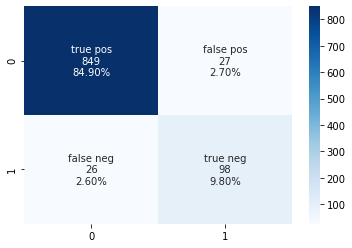

In [165]:
confussion_matrix(con_matb)

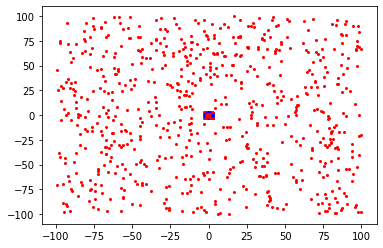

In [166]:
plotting_train(trainb)

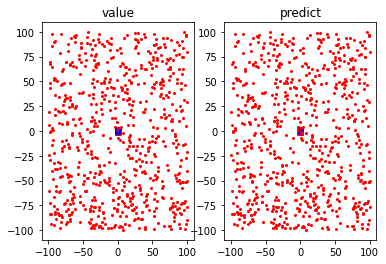

In [167]:
plotting_test(first_testb)

In [32]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [33]:
!pip install tensorflow-gpu==2.0.0-alpha0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-alpha0
